On Windows - Use Zadig to install WinUSB driver for this spectrometer.

Install pyusb and libusb. Move libusb dll from site-packages/libusb/...../x64 to Windows/system32 folder

In [18]:
import usb.core

In [22]:
dev = usb.core.find(idVendor = 0x1180, idProduct = 0x0012)
print(dev)

None


In [3]:
dev.set_configuration()

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from matplotlib.colors import LogNorm

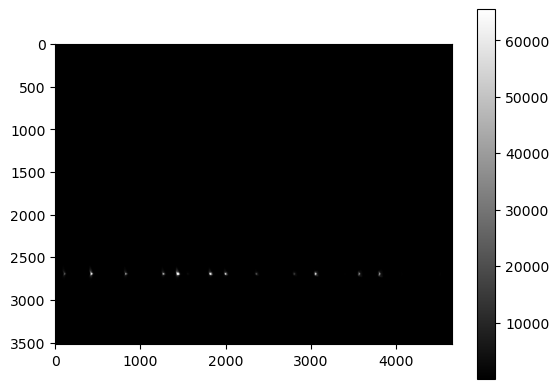

In [2]:
# Show image in specImages folder using astropy

# Open the file
hdu_list = fits.open(r'specImages\NeonGrat2\2023-05-24_20_07_46Z\2023-05-24-2007_7-Neon_0000.FIT')

# Get image data
image_data = hdu_list[0].data

# Display image data
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

In [1]:
# Move all FIT files from specImages/NeonGrat2 subfolders to specImages/NeonGrat2


# Get list of subfolders
subfolders = [f.path for f in os.scandir(r'specImages\NeonGrat2') if f.is_dir()]

# Move all FIT files to specImages/NeonGrat2
for subfolder in subfolders:
    files = [f.path for f in os.scandir(subfolder) if f.is_file()]
    for file in files:
        shutil.move(file, r'specImages\NeonGrat2')

In [2]:
# Delete all subfolders in specImages/NeonGrat2
for subfolder in subfolders:
    shutil.rmtree(subfolder)


In [3]:
# Delete all .txt files in specImages/NeonGrat2
files = [f.path for f in os.scandir(r'specImages\NeonGrat2') if f.is_file()]
for file in files:
    if file.endswith('.txt'):
        os.remove(file)

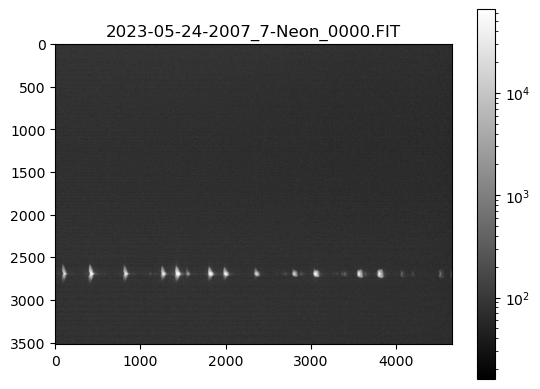

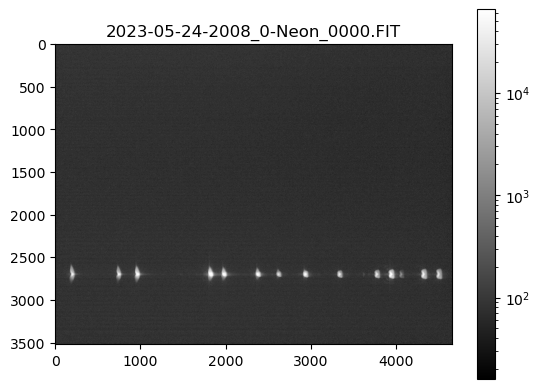

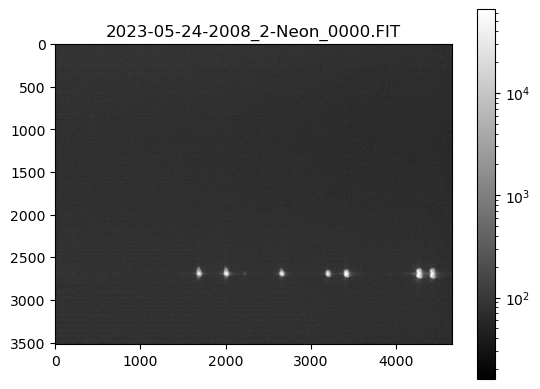

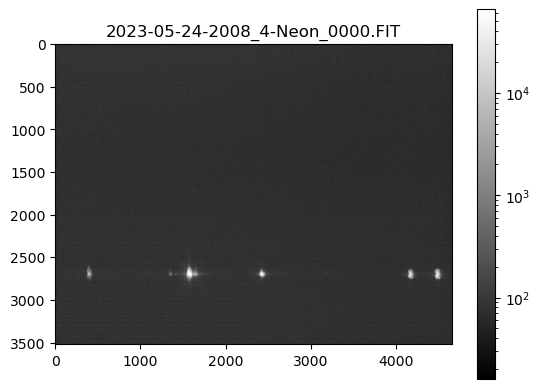

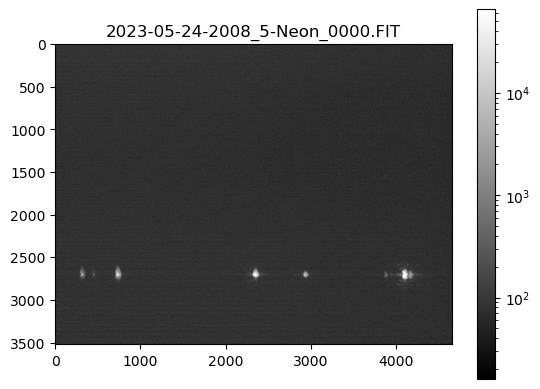

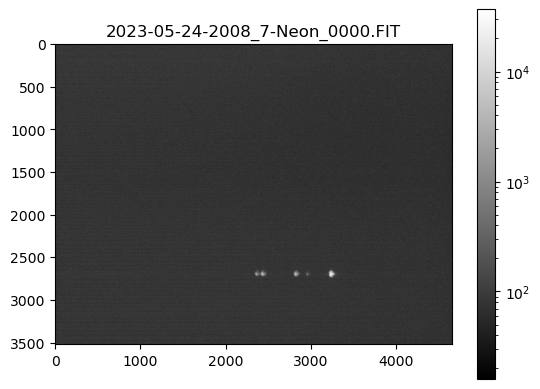

In [8]:
# Show each image in specImages folder using astropy


# Get list of FIT files
files = [f.path for f in os.scandir(r'specImages\NeonGrat2') if f.is_file()]

# Display each image
for file in files:
    # Open the file
    hdu_list = fits.open(file)

    # Get image data
    image_data = hdu_list[0].data

    # Display image data using log scale
    plt.imshow(image_data, cmap='gray', norm=LogNorm())
    # Title is the file name without the path
    plt.title(file[file.rfind('\\')+1:])
    plt.colorbar()
    plt.show()

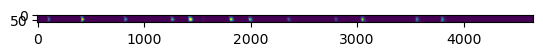

In [15]:
# Plot rows 2600-2800 of the first image in files

# Open the file
hdu_list = fits.open(files[0])

# Get image data
image_data = hdu_list[0].data

# Plot rows 2600-2800
plt.imshow(image_data[2650:2720])
plt.show()

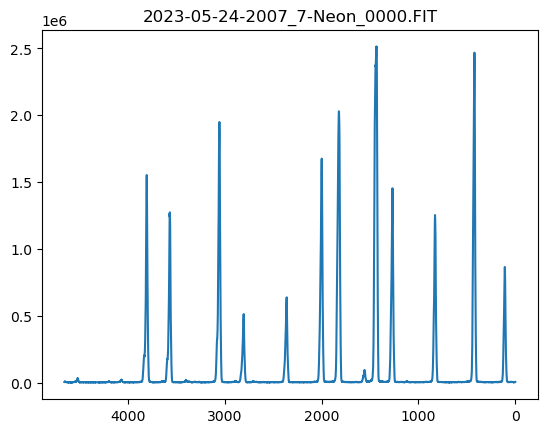

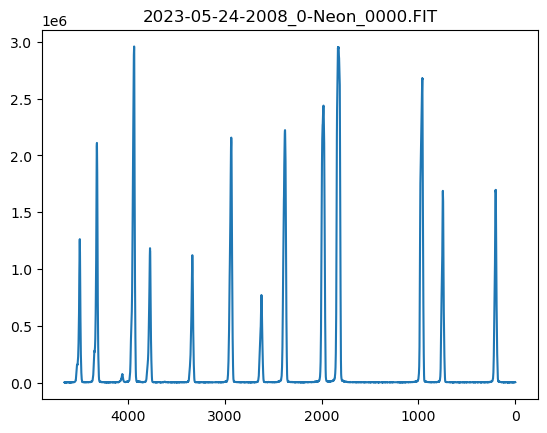

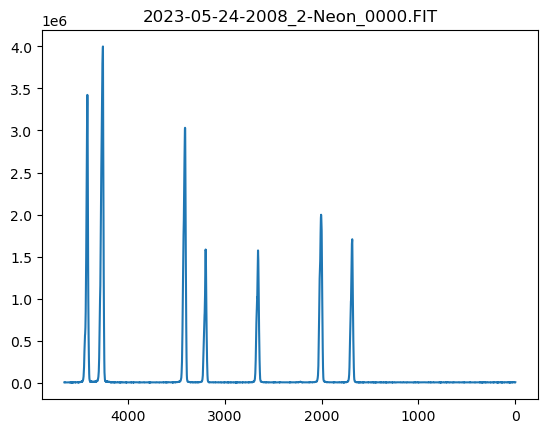

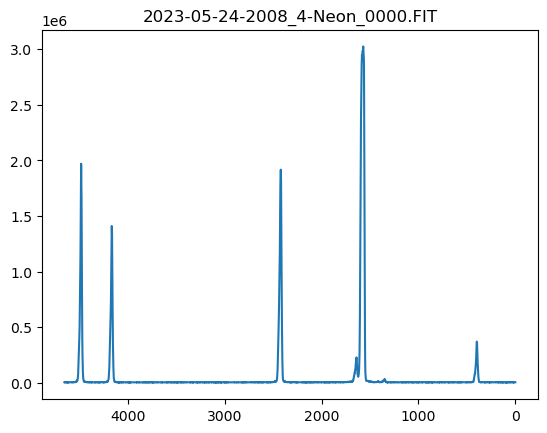

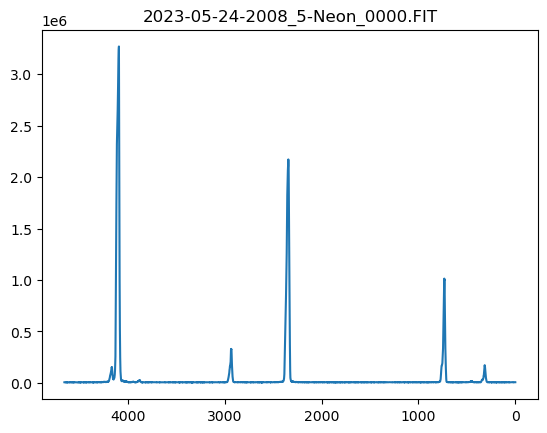

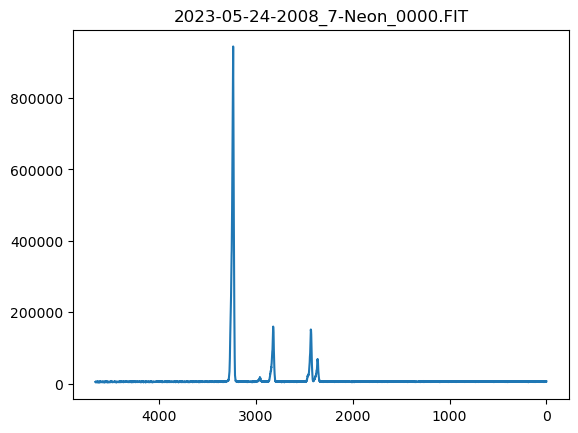

In [2]:
# # Show rows 2500 - 3000 of each image in specImages folder using astropy
# # Get list of FIT files
# files = [f.path for f in os.scandir(r'specImages\NeonGrat2') if f.is_file()]

# # Display each image
# for file in files:
#     # Open the file
#     hdu_list = fits.open(file)

#     # Get image data
#     image_data = hdu_list[0].data

#     # Display image data using log scale
#     plt.imshow(image_data[2500:3000, :], cmap='gray', norm=LogNorm())
#     # Title is the file name without the path
#     plt.title(file[file.rfind('\\')+1:])
#     plt.colorbar()
#     plt.show()


# Now show all plots stacked on top of each other
# Get list of FIT files
files = [f.path for f in os.scandir(r'specImages\NeonGrat2') if f.is_file()]

# Display each image
for file in files:
    # Open the file
    hdu_list = fits.open(file)

    # Get image data
    image_data = hdu_list[0].data

    # Display image data using log scale
    plt.plot(image_data[2650:2720, :].sum(axis=0))

    # Flip x axis
    plt.gca().invert_xaxis()
    # Title is the file name without the path
    plt.title(file[file.rfind('\\')+1:])
    plt.show()

In [2]:
# Append all plots to one plot

# Get list of FIT files
files = [f.path for f in os.scandir(r'specImages\NeonGrat2') if f.is_file()]

# Set up sum_list as a numpy array
sum_list = np.array([])

# Display each image
for file in files:
    # Open the file
    hdu_list = fits.open(file)

    # Get image data
    image_data = hdu_list[0].data

    # Sum columns in rows 2650-2720
    img_sum = image_data[2650:2720, :].sum(axis=0)

    # Reverse the order of the elements in img_sum
    img_sum = img_sum[::-1]

    # Append img_sum to sum_list
    sum_list = np.append(sum_list, img_sum)

# Normalize sum_list to the maximum value
sum_list = sum_list / sum_list.max()

In [3]:
# Get number of columns in each image
num_cols = image_data.shape[1]
print(num_cols)

4656


In [4]:
# Detect peaks in sum_list
from scipy.signal import find_peaks

peaks, _ = find_peaks(sum_list, height=0.025, distance=100)

In [5]:
peaks

array([  850,  1089,  1600,  1851,  2295,  2656,  2834,  3221,  3387,
        3826,  4233,  4547,  4815,  4992,  5376,  5540,  5977,  6379,
        6690,  6934,  7331,  7486,  8352,  8563,  9109,  9549,  9710,
       10557, 10770, 11311, 11962, 12284, 14141, 14457, 16202, 17053,
       18226, 19187, 20345, 20936, 22546, 22963, 24701, 25114, 25503],
      dtype=int64)

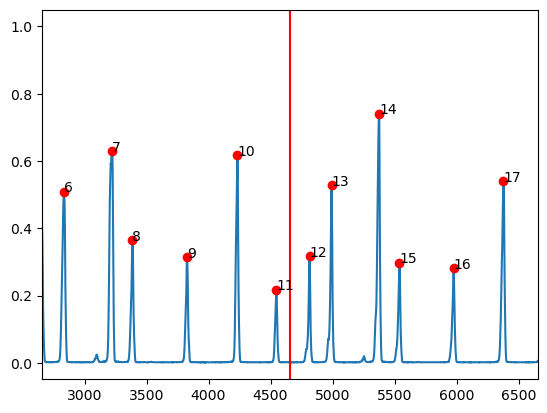

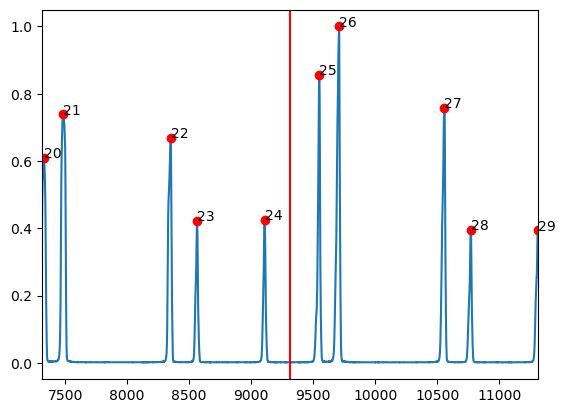

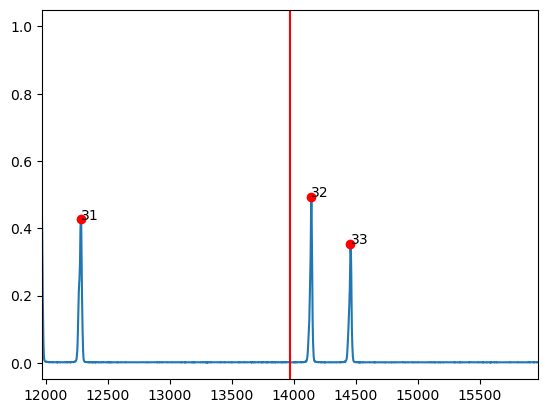

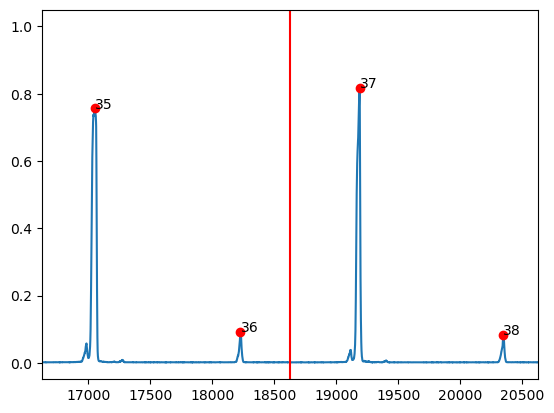

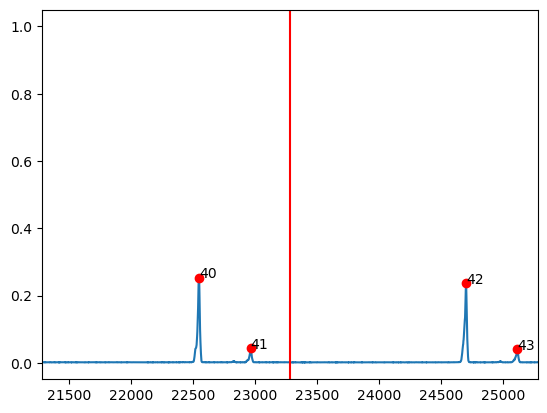

In [5]:
# Plot sum_list as above, with a window of 1000 elements
# around each num_cols element
window_size = 4000
for i in range(1, len(sum_list)//num_cols):
    # Plot sum_list, changing color every num_cols elements
    plt.plot(sum_list)

    # Set axes to the first window
    min_x = (i)*num_cols - window_size/2
    max_x = min_x + window_size
    plt.xlim(min_x, max_x)

    # Label peaks by placing a dot at each peak
    for peak in peaks:
        if peak < max_x and peak > min_x:
            plt.plot(peak, sum_list[peak], 'ro')
            # Number each peak with its index in peaks_list
            plt.text(peak, sum_list[peak], str(np.where(peaks==peak)[0][0]))

    for i in range(1, len(sum_list)//num_cols):
        plt.axvline(x=i*num_cols, color='red')

    plt.show()

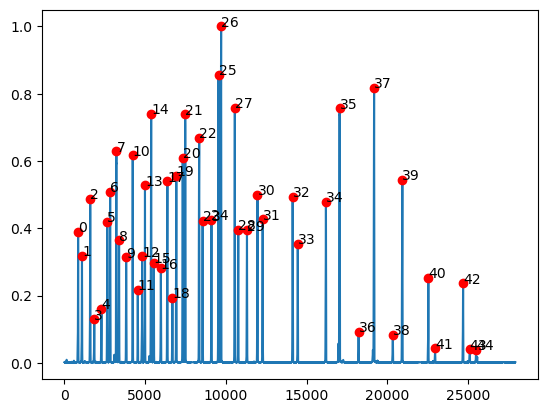

In [9]:
# Show one plot with each peak labeled

# Plot sum_list
plt.plot(sum_list)

# Label peaks by placing a dot at each peak
for peak in peaks:
    plt.plot(peak, sum_list[peak], 'ro')
    # Number each peak with its index in peaks_list
    plt.text(peak, sum_list[peak], str(np.where(peaks==peak)[0][0]))

plt.show()


In [ ]:
# Generate a list of all neon peaks in angstroms between 5800 and 7500
# from https://physics.nist.gov/PhysRefData/Handbook/Tables/neontable2.htm
neon_peaks = [5852.49, 5881.89, 5944.83, 5975.53, 6030.00, 6074.34, 6096.16, 6143.06, 6163.59, 6217.28, 6266.49, 6304.79, 6334.43, 6382.99, 6402.25, 6506.53, 6532.88, 6598.95, 6929.47, 7032.41, 7245.17, 7438.90]

[1.22602026e-01 5.74849490e+03]


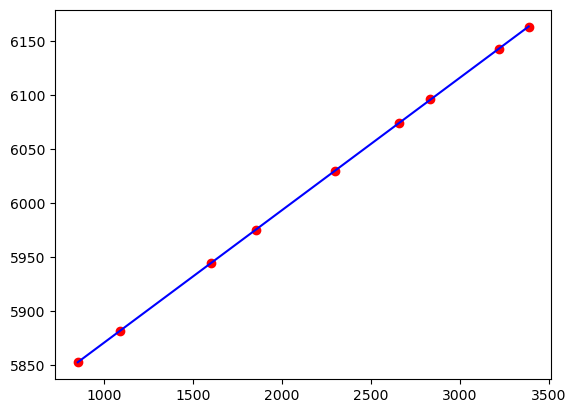

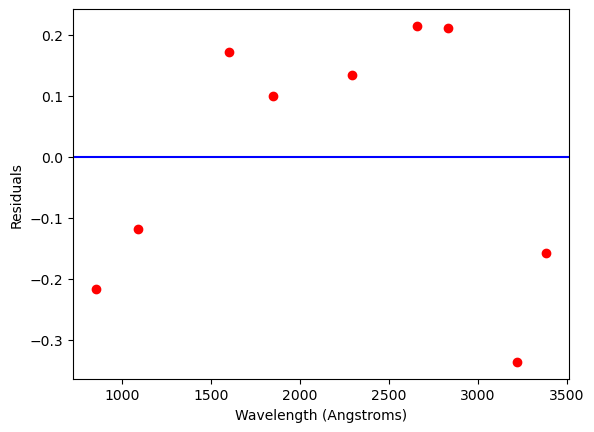

In [14]:
# Calibrate the wavelength axis
# Peak 0 is at 5852.49 Angstroms
# Peak 1 is at 5881.89 Angstroms
# Peak 2 is at 5944.83 Angstroms
# Peak 3 is at 5975.53 Angstroms
# Peak 4 is at 6030.00 Angstroms
# Peak 5 is at 6074.34 Angstroms
# Peak 6 is at 6096.16 Angstroms
# Peak 7 is at 6143.06 Angstroms
# Peak 8 is at 6163.59 Angstroms

# Create a list of the wavelengths of each peak
wavelengths = [5852.49, 5881.89, 5944.83, 5975.53, 6030.00, 6074.34, 6096.16, 6143.06, 6163.59]

# Create a list of the pixel locations of each peak
peaks_list = peaks[0:9]

# Fit a line to the peaks
from scipy.optimize import curve_fit

# Define a linear function
def linear(x, m, b):
    return m*x + b

# Fit a line to the peaks
popt, pcov = curve_fit(linear, peaks_list, wavelengths)

# Print the slope and y-intercept
print(popt)

# Plot the peaks and the line
plt.plot(peaks_list, wavelengths, 'ro')
plt.plot(peaks_list, linear(peaks_list, *popt), 'b-')
plt.show()

# Plot residuals
plt.plot(peaks_list, wavelengths - linear(peaks_list, *popt), 'ro') # Residuals
plt.axhline(y=0, color='b') # Zero line

# Scale x axis to wavelength
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Residuals')

plt.show()

[-2.78593681e-07  1.23786087e-01  5.74744286e+03]


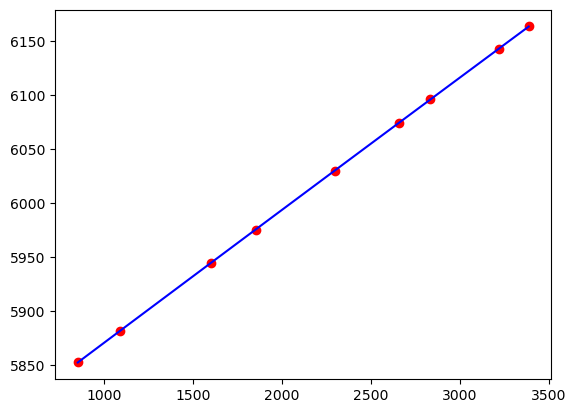

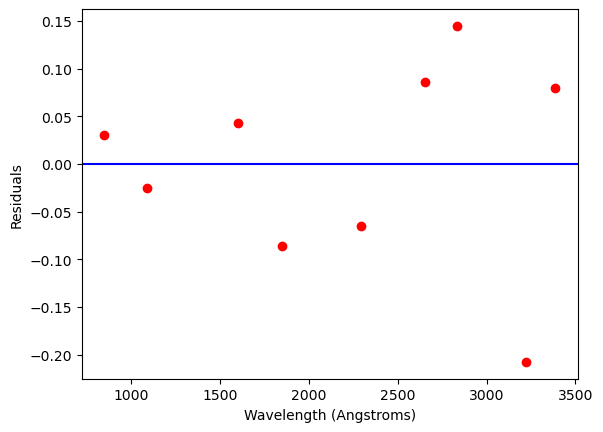

In [6]:
# Create a list of the wavelengths of each peak
wavelengths = [5852.49, 5881.89, 5944.83, 5975.53, 6030.00, 6074.34, 6096.16, 6143.06, 6163.59]

# Create a list of the pixel locations of each peak
peaks_list = peaks[0:9]

# Fit a line to the peaks
from scipy.optimize import curve_fit

def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

# Fit a line to the peaks
popt, pcov = curve_fit(quadratic, peaks_list, wavelengths)

# Print the slope and y-intercept
print(popt)

# Plot the peaks and the line
plt.plot(peaks_list, wavelengths, 'ro')
plt.plot(peaks_list, quadratic(peaks_list, *popt), 'b-')
plt.show()

# Plot residuals
plt.plot(peaks_list, wavelengths - quadratic(peaks_list, *popt), 'ro') # Residuals
plt.axhline(y=0, color='b') # Zero line

# Scale x axis to wavelength
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Residuals')

plt.show()

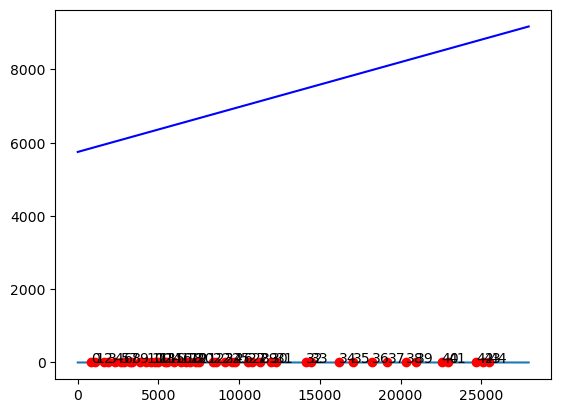

In [15]:
# Plot spectrum with wavelength axis

# Plot sum_list
plt.plot(sum_list)

# Label peaks by placing a dot at each peak
for peak in peaks:
    plt.plot(peak, sum_list[peak], 'ro')
    # Number each peak with its index in peaks_list
    plt.text(peak, sum_list[peak], str(np.where(peaks==peak)[0][0]))



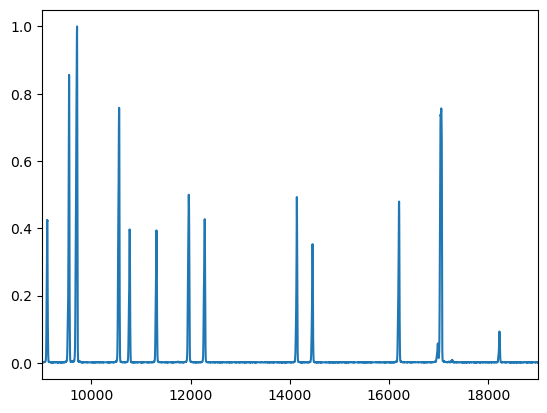

In [52]:
# Plot x axis from 9000 to 19000
plt.plot(sum_list)
plt.xlim(9000, 19000)
plt.show()

In [6]:
# Calculate distance between points 7, 14; 8, 15; 9, 16; 10, 17; 11, 18

# # Get list of peaks
# peaks = [peak for peak in peaks if peak > 9000 and peak < 19000]

# Calculate distance between points 7, 14; 8, 15; 9, 16; 10, 17; 11, 18
for i in range(7, 12):
    print(peaks[i+7] - peaks[i])

2155
2153
2151
2146
2143


In [7]:
# Calculate average distance between points 7, 14; 8, 15; 9, 16; 10, 17; 11, 18
avg_dist = np.mean([peaks[i+7] - peaks[i] for i in range(7, 12)])
avg_dist

2149.6

Start:  4656 End:  9312
Min:  2507 Max:  7162
Start:  9312 End:  13968
Min:  5014 Max:  9669
Start:  13968 End:  18624
Min:  7521 Max:  12176
Start:  18624 End:  23280
Min:  10028 Max:  14683


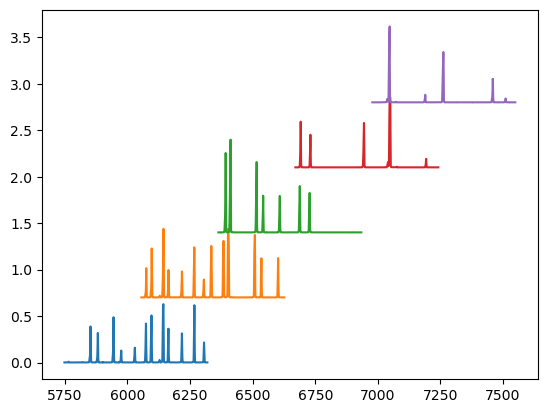

In [18]:
# Get list of indices for first spectrum
indices = np.arange(0, num_cols)

# Change indices to wavelength
indices = indices*popt[0] + popt[1]

# Plot spectrum of first image (using sum_list), using wavelength as x axis
plt.plot(indices, sum_list[0:num_cols])

# Plot next 4 spectra, shifting indices to the right by int(num_cols - avg_dist)
for i in range(1, 5):
    # Calculate start and end indices
    start = int(i*(num_cols))
    end = int((i+1)*num_cols)
    print("Start: ", start, "End: ", end)

    # Get next spectrum
    next_spec = sum_list[start:end]

    # Generate new list of indices, shifted by int(num_cols - avg_dist)
    new_indices = np.arange(start, end) - int(avg_dist)*i

    # Print min and max of new_indices
    print("Min: ", new_indices.min(), "Max: ", new_indices.max())

    # Change new_indices to wavelength
    new_indices = linear(new_indices, *popt)

    # Plot next spectrum, shifting indices with new_indices
    plt.plot(new_indices, next_spec+i*0.7)

plt.show()


Start:  4656 End:  9312
Min:  2507 Max:  7162
Start:  9312 End:  13968
Min:  5014 Max:  9669
Start:  13968 End:  18624
Min:  7521 Max:  12176
Start:  18624 End:  23280
Min:  10028 Max:  14683


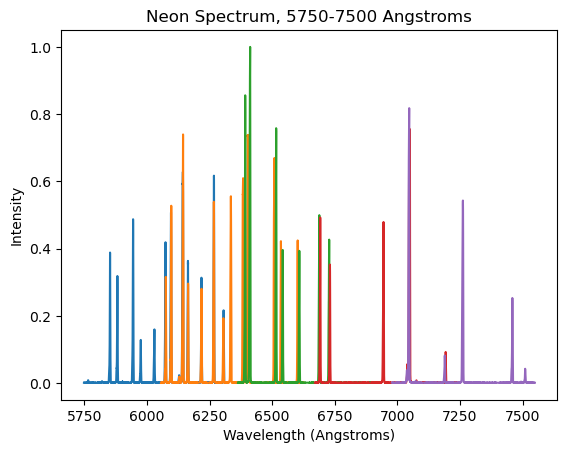

In [22]:
# Get list of indices for first spectrum
indices = np.arange(0, num_cols)

# Change indices to wavelength
indices = indices*popt[0] + popt[1]

# Plot spectrum of first image (using sum_list), using wavelength as x axis
plt.plot(indices, sum_list[0:num_cols])

# Plot next 4 spectra, shifting indices to the right by int(num_cols - avg_dist)
for i in range(1, 5):
    # Calculate start and end indices
    start = int(i*(num_cols))
    end = int((i+1)*num_cols)
    print("Start: ", start, "End: ", end)

    # Get next spectrum
    next_spec = sum_list[start:end]

    # Generate new list of indices, shifted by int(num_cols - avg_dist)
    new_indices = np.arange(start, end) - int(avg_dist)*i

    # Print min and max of new_indices
    print("Min: ", new_indices.min(), "Max: ", new_indices.max())

    # Change new_indices to wavelength
    new_indices = linear(new_indices, *popt)

    # Title is Neon Spectrum, 5750-7500 Angstroms
    plt.title("Neon Spectrum, 5750-7500 Angstroms")

    # X axis is wavelength in Angstroms
    plt.xlabel("Wavelength (Angstroms)")

    # Y axis is intensity
    plt.ylabel("Intensity")

    # Plot next spectrum, shifting indices with new_indices
    plt.plot(new_indices, next_spec)

plt.show()